## 实际问题举例

### 监督学习举例: Iris 数据集花卉分类

接下来我们使用 Iris 数据集，并如何检验训练好的模型对于新数据（训练中未出现过的数据）的预测能力？

我们将使用高斯朴素贝叶斯模型来对 Iris 数据集作分类处理。
这里不需要超参数，高斯朴素贝叶斯模型往往作为 baseline 模型。

首先用 ``train_test_split`` 将数据分成训练集和测试集（*training set* 和 *test set*）。

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# 加载文件中的数据
iris = pd.read_csv('iris.csv')

# 丢弃首末两列
X_iris = iris.drop(['Unnamed: 0', 'Species'], axis=1)
X_iris.shape

(150, 4)

In [3]:
y_iris = iris['Species']
y_iris.shape

(150,)

In [4]:
# No module named 'sklearn.cross_validation'
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [5]:
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(112, 4) (38, 4) (112,) (38,)


In [7]:
# 1. 选择某类模型
from sklearn.naive_bayes import GaussianNB 

# 2. 初始化模型，这里不需要指定超参数
model = GaussianNB()

# 3. 训练模型
model.fit(Xtrain, ytrain)

# 4. 预测新数据
y_model = model.predict(Xtest)          

In [8]:
type(y_model)

numpy.ndarray

In [9]:
type(ytest)

pandas.core.series.Series

In [10]:
print(ytest, y_model)

14         setosa
98     versicolor
75     versicolor
16         setosa
131     virginica
56     versicolor
141     virginica
44         setosa
29         setosa
120     virginica
94     versicolor
5          setosa
102     virginica
51     versicolor
78     versicolor
42         setosa
92     versicolor
66     versicolor
31         setosa
35         setosa
90     versicolor
84     versicolor
77     versicolor
40         setosa
125     virginica
99     versicolor
33         setosa
19         setosa
73     versicolor
146     virginica
91     versicolor
135     virginica
69     versicolor
128     virginica
114     virginica
48         setosa
53     versicolor
28         setosa
Name: Species, dtype: object ['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'virginica'

调用 ``accuracy_score`` 查看准确率:

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### 非监督学习举例 之 Iris 数据降维

- 降维，为了更简约地表示数据，并有利于数据可视化。


- 降维任务的要求：是否存在一个保留数据特征的低维表示。

通过主成分分析 principal component analysis (PCA), 将数据降到 2 维。

In [13]:
# 1. 选择某类模型
from sklearn.decomposition import PCA

# 2. 实例化模型并初始化超参数
model = PCA(n_components=2)

# 3. 拟合数据，这里只用到X，没有涉及目标向量y
model.fit(X_iris)

# 4. 将数据转化到2维
X_2D = model.transform(X_iris)

绘制结果，我们把计算结果直接附加到 Iris 数据的``DataFrame``里, 使用 Seaborn 绘制。

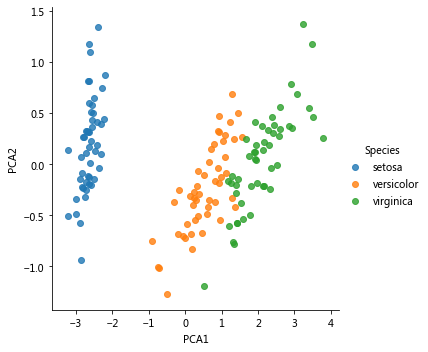

In [15]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue='Species', data=iris, fit_reg=False);

#### 说明

- 2 维表示将花卉种类很好地分割开了，要知道 PCA 并没有用到标签向量 y。


- 这也预示着，不依赖于标签，直接对数据作分类预测有时候也是可行的。

### 非监督学习举例 之 Iris 聚类

聚类算法在没有标签的情况下将数据分成不同类别。

- 这里采用高斯混合模型 Gaussian mixture model (GMM)。


- 一个高斯混合模型 GMM 试图用若干个高斯核拟合数据。

In [16]:
# 1. 选择某类模型
from sklearn.mixture import GaussianMixture as GMM

# 2. 实例化模型并初始化超参数
model = GMM(n_components=3, covariance_type='full')

# 3. 拟合数据
model.fit(X_iris)

# 4. 预测分类
y_gmm = model.predict(X_iris)

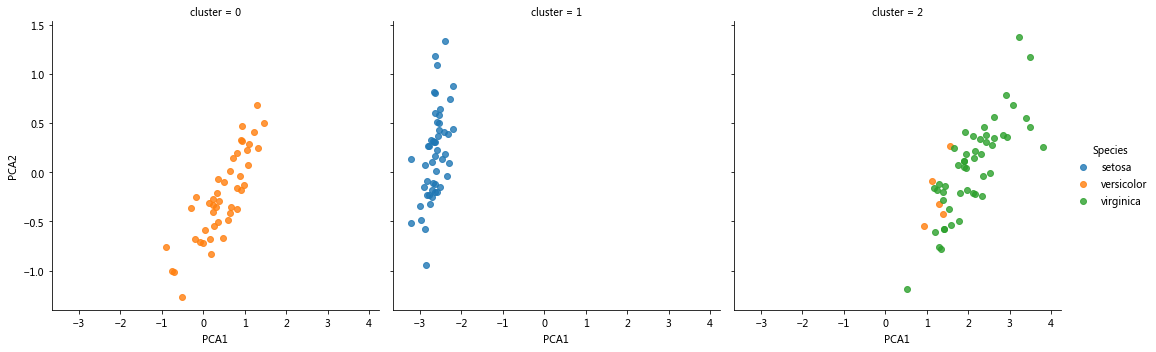

In [17]:
iris['cluster'] = y_gmm

sns.lmplot("PCA1", "PCA2", data=iris, hue='Species', col='cluster', fit_reg=False);

观察下发现，蓝色点显示的 *setosa* 种类被完美的分割出来了, *versicolor* 和 *virginica* 两种有个别点混在一起。

说明这四个特征对于区分花卉种类这一问题一定程度上已经足够了。这样的结果对于花卉领域的专家来说，也可以得到一定的启示。